In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
data=pd.read_csv("AirPassengers.csv",usecols=[1])

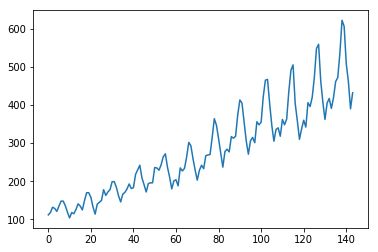

In [47]:
plt.plot(data)
plt.show()

In [48]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
np.random.seed(7)

In [49]:
dataset = data.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [50]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [51]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [52]:

# reshape into X=t and Y=t+1
look_back1 = 15
trainX, trainY = create_dataset(train, look_back1)
testX, testY = create_dataset(test, look_back1)

In [53]:
trainX[1]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
      dtype=float32)

In [54]:





# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
'''
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
'''

'\n# reshape input to be [samples, time steps, features]\n#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))\n#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))\n'

In [55]:
# Initialising the RNN
from keras.layers import Dropout
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (1, look_back1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 40))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [56]:
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 50s - loss: 0.0234
Epoch 2/100
 - 0s - loss: 0.0074
Epoch 3/100
 - 0s - loss: 0.0056
Epoch 4/100
 - 0s - loss: 0.0041
Epoch 5/100
 - 0s - loss: 0.0034
Epoch 6/100
 - 0s - loss: 0.0044
Epoch 7/100
 - 0s - loss: 0.0037
Epoch 8/100
 - 0s - loss: 0.0026
Epoch 9/100
 - 0s - loss: 0.0027
Epoch 10/100
 - 0s - loss: 0.0031
Epoch 11/100
 - 0s - loss: 0.0017
Epoch 12/100
 - 0s - loss: 0.0033
Epoch 13/100
 - 0s - loss: 0.0020
Epoch 14/100
 - 0s - loss: 0.0024
Epoch 15/100
 - 0s - loss: 0.0021
Epoch 16/100
 - 0s - loss: 0.0026
Epoch 17/100
 - 0s - loss: 0.0014
Epoch 18/100
 - 0s - loss: 0.0014
Epoch 19/100
 - 0s - loss: 0.0018
Epoch 20/100
 - 0s - loss: 0.0020
Epoch 21/100
 - 0s - loss: 0.0015
Epoch 22/100
 - 0s - loss: 0.0017
Epoch 23/100
 - 0s - loss: 0.0015
Epoch 24/100
 - 0s - loss: 0.0017
Epoch 25/100
 - 0s - loss: 0.0017
Epoch 26/100
 - 0s - loss: 0.0019
Epoch 27/100
 - 0s - loss: 0.0014
Epoch 28/100
 - 0s - loss: 0.0017
Epoch 29/100
 - 0s - loss: 0.0016
Epoch 30/100
 - 0s - l

In [57]:

# make predictions
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 10.46 RMSE
Test Score: 18.23 RMSE


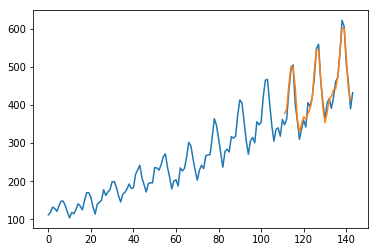

In [60]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back1:len(trainPredict)+look_back1, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back1*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
